The Spark DataFrame is a feature that allows us to create and work with DataFrame objects. As we may have guessed, pandas inspired it.

Spark is well known for its ability to [process large data sets](https://app.dataquest.io/m/91/spark-dataframes/1/the-spark-dataframe-an-introduction). Spark DataFrames combine the scale and speed of Spark with the familiar **query**, **filter**, and **analysis** capabilities of pandas. Unlike pandas, which can only run on one computer, Spark can use distributed memory (and disk when necessary) to handle larger data sets and run computations more quickly.

Spark DataFrames allow us to modify and reuse our existing pandas code to scale up to much larger data sets. They also have better support for various data formats. We can even use a SQL interface to write distributed SQL queries that query large database systems and other data stores.

For this file, we'll be working with a JSON file containing data from the 2010 U.S. Census. It has the following columns:

* age - Age (year)
* females - Number of females
* males - Number of males
* total - Total number of individuals
* year - Year column (2010 for all rows)

Let's open and explore the data set before we dive into Spark DataFrames.

In [1]:
f = open('census_2010.json')

for i in range(0,4):
    print(f.readline())

{"females": 1994141, "total": 4079669, "males": 2085528, "age": 0, "year": 2010}

{"females": 1997991, "total": 4085341, "males": 2087350, "age": 1, "year": 2010}

{"females": 2000746, "total": 4089295, "males": 2088549, "age": 2, "year": 2010}

{"females": 2002756, "total": 4092221, "males": 2089465, "age": 3, "year": 2010}



In previous files, we explored reading data into an RDD object. Recall that an RDD is essentially a list of tuples with no enforced schema or structure of any kind. An RDD can have a variable number of elements in each tuple, and combinations of types between tuples.

RDDs are useful for representing unstructured data like text. Without them, we'd need to write a lot of custom Python code to interact with such data.

We use the SparkContext object to read data into an RDD:

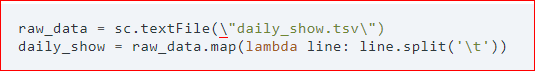

To use the familiar DataFrame query interface from pandas, however, the data representation needs to include rows, columns, and types. Spark's implementation of DataFrames mirrors the pandas implementation, with logic for rows and columns.

The Spark SQL class is very powerful. It gives Spark more information about the data structure we're using and the computations we want to perform. Spark uses that information to optimize processes.

To take advantage of these features, we'll have to use the SQLContext object to structure external data as a DataFrame, instead of the SparkContext object.

We can query Spark DataFrame objects with SQL. The SQLContext class gets its name from this capability.

This class allows us to read in data and create new DataFrames from a wide range of sources. It can do this because it takes advantage of Spark's powerful [Data Sources API](https://databricks.com/blog/2015/01/09/spark-sql-data-sources-api-unified-data-access-for-the-spark-platform.html).

**File Formats**

* JSON, CSV/TSV, XML
* Parquet, Amazon S3 (cloud storage service)

**Big Data Systems**

* Hive, Avro, HBase

**SQL Database Systems**

* MySQL, PostgreSQL

Data science organizations often use a wide range of systems to collect and store data, and they're constantly making changes to those systems. Spark DataFrames allow us to interface with different types of data, and ensure that our analysis logic will still work as the data storage mechanisms change.

Now that we've learned a bit about Spark DataFrames, let's read in census_2010.json. This data set contains valid JSON on each line, which is what Spark needs in order to read the data in properly.

In the following code cell, we:

* Import SQLContext from the pyspark.sql library
* [Instantiate the SQLContext object](https://spark.apache.org/docs/1.5.0/api/python/pyspark.sql.html#pyspark.sql.SQLContext) (which requires the SparkContext object (sc) as a parameter), and assign it to the variable sqlCtx
* Use the SQLContext method read.json() to read the JSON data set into a Spark DataFrame object named df
* Print df's data type to confirm that we successfully read it in as a Spark DataFrame

In [2]:
import pyspark

sc = pyspark.SparkContext()

In [3]:
# Import SQLContext
from pyspark.sql import SQLContext

In [4]:
# Pass in the SparkContext object `sc`
sqlCtx = SQLContext(sc)

In [5]:
# Read JSON data into a DataFrame object `df`
df = sqlCtx.read.json("census_2010.json")

# Print the type
print(type(df))

<class 'pyspark.sql.dataframe.DataFrame'>


When we read data into the SQLContext object, Spark:

* Instantiates a Spark DataFrame object
* Infers the schema from the data and associates it with the DataFrame
* Reads in the data and distributes it across clusters (if multiple clusters are available)
* Returns the DataFrame object

We expect the DataFrame Spark created to have the following columns, which were the keys in the JSON data set:

* age
* females
* males
* total
* year

Spark has its own type system that's similar to the pandas type system. To create a DataFrame, Spark iterates over the data set twice - once to extract the structure of the columns, and once to infer each column's type. Let's use one of the Spark DataFrame instance methods to display the schema for the DataFrame we're working with.

Call the [printSchema()](http://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame.printSchema) method on the Spark DataFrame df to display the schema that Spark inferred.

In [8]:
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- females: long (nullable = true)
 |-- males: long (nullable = true)
 |-- total: long (nullable = true)
 |-- year: long (nullable = true)



As we mentioned before, the pandas DataFrame heavily influenced the Spark DataFrame implementation. Here are some of the methods we can find in both:

* agg()
* join()
* sort()
* where()

Unlike pandas DataFrames, however, Spark DataFrames are immutable, which means we can't modify existing objects. Most transformations on an object return a new DataFrame reflecting the changes instead. Spark's creators deliberately designed immutability into Spark to make it easier to work with distributed data structures.

Pandas and Spark DataFrames also have different underlying data structures. Pandas DataFrames are built around Series objects, while Spark DataFrames are built around RDDs. We can perform most of the same computations and transformations on Spark DataFrames that we can on pandas DataFrames, but the styles and methods are somewhat different. We'll explore how to perform common pandas functions with Spark in this file.

Use the show() [method](https://spark.apache.org/docs/1.5.0/api/python/pyspark.sql.html#pyspark.sql.DataFrame.show) to print the first five rows of the DataFrame.

In [9]:
df.show(5)

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
+---+-------+-------+-------+----+
only showing top 5 rows



In pandas, we used the head() method to return the first n rows. This is one of the differences between the DataFrame implementations. Instead of returning a nicely formatted table of values, the head() method in Spark returns a list of [row](https://spark.apache.org/docs/1.5.0/api/python/pyspark.sql.html#pyspark.sql.Row) objects. Spark needs to return row objects for certain methods, such as head(), collect() and take().

We can access a row's attributes by the column name using dot notation, and by position using bracket notation with an index:

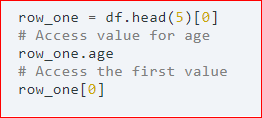

In [11]:
# Use the head() method to return the first five rows in the DataFrame 
# as a list of row objects,
first_five = df.head(5) # df.take(5)
first_five

[Row(age=0, females=1994141, males=2085528, total=4079669, year=2010),
 Row(age=1, females=1997991, males=2087350, total=4085341, year=2010),
 Row(age=2, females=2000746, males=2088549, total=4089295, year=2010),
 Row(age=3, females=2002756, males=2089465, total=4092221, year=2010),
 Row(age=4, females=2004366, males=2090436, total=4094802, year=2010)]

In [14]:
first_five[0].age

0

In [16]:
for i in first_five:
    print(i.age)

0
1
2
3
4


In pandas, we passed a string into a single pair of brackets ([]) to select an individual column, and passed in a list to select multiple columns:

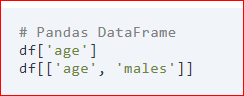

We can still use bracket notation in Spark. We'll need to pass in a list of string objects, though, even when we're only selecting one column.

Spark takes advantage of lazy loading with DataFrames, and will only display the results of an operation when we call the **show()** method. Instead of using bracket notation, we can also use the **select()** method to select columns:

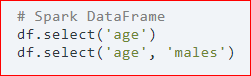

In [35]:
df[['age']]
df[['age','males', 'females']].show(5)

+---+-------+-------+
|age|  males|females|
+---+-------+-------+
|  0|2085528|1994141|
|  1|2087350|1997991|
|  2|2088549|2000746|
|  3|2089465|2002756|
|  4|2090436|2004366|
+---+-------+-------+
only showing top 5 rows



In [21]:
# Alternate method
df.select('age', 'males', 'females').show(5)

+---+-------+-------+
|age|  males|females|
+---+-------+-------+
|  0|2085528|1994141|
|  1|2087350|1997991|
|  2|2088549|2000746|
|  3|2089465|2002756|
|  4|2090436|2004366|
+---+-------+-------+
only showing top 5 rows



In pandas, we used Boolean filtering to select only the rows we were interested in. Spark preserves the very same functionality and notation.

In [25]:
five_plus = df[df["age"] > 5]
five_plus.show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
| 20|2151448|2259690|4411138|2010|
| 21|2140926|2244039|4384965|2010|
| 22|2133510|2229168|4362678|2010|
| 23|2132897|2218195|4351092|2010|
| 24|2135789|2208905|4344694|2010|
| 25|2136497|2197148|4333645|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



We can compare the columns in Spark DataFrames with each other, and use the comparison criteria as a filter. For example, to get the rows where the population of males exceeded females in 2010, we'd write the same notation that we would use in pandas.

In [27]:
# all of the rows where females is less than males
df[df["males"] > df["females"]].show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
|  5|2005925|2091803|4097728|2010|
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



The Spark DataFrame is fairly new, and the library's still a bit limited. There's no easy way to create a histogram of the data in a column, for example, or a line plot of the values in two columns.

To handle some of these shortcomings, we can convert a Spark DataFrame to a pandas DataFrame using the **toPandas()** method. Converting an entire Spark DataFrame to a pandas DataFrame works just fine for small data sets. For larger ones, though, we'll want to select a subset of the data that's more manageable for pandas.

Use the [toPandas() method](https://spark.apache.org/docs/1.5.0/api/python/pyspark.sql.html#pyspark.sql.DataFrame.toPandas) to convert the Spark DataFrame to a Pandas DataFrame

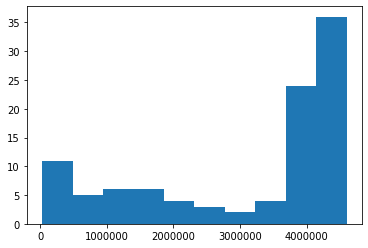

In [33]:
import matplotlib.pyplot as plt

pandas_df = df.toPandas()
pandas_df['total'].hist(grid = False)
plt.show()

In this file, we explored the Spark DataFrame, and how to work with its methods to query and analyze data.